In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [86]:
url = 'C:\\Anaconda\\aaa\\echocardiogram.data'
data = pd.read_csv(url, sep = ',', na_values = '?', engine = 'python')

In [87]:
data = data.fillna(data.median(axis = 0), axis = 0)
data.columns = ['C' + str(i) for i in range(1, 14)]

In [88]:
data.keys()

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13'],
      dtype='object')

Отбрасываем ненужный столбец с именами.
Х - входные данные, Y  - данные классификации.

In [89]:
X = data.drop(('C13'), axis = 1) 
X = data.drop(('C11'), axis = 1)
y = data['C13']
print(X.shape)
print(y.shape)

(131, 12)
(131,)


Разделяем данные на обучающую и тестовую выборки. Соотношением 70 на 30.

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 7)
N_test, _ = X_test.shape

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65, 12)
(66, 12)
(65,)
(66,)


In [92]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

        C1   C2      C3   C4     C5      C6     C7     C8     C9    C10  C12  \
91   53.00  0.0  59.000  0.0  0.344   9.100  4.040   9.00  1.000  0.643  2.0   
27    0.25  1.0  75.000  0.0  0.200  11.000  4.665  14.00  1.000  0.786  2.0   
107   0.75  1.0  78.000  0.0  0.230  40.000  6.230  14.00  1.400  0.714  2.0   
88   15.00  1.0  60.000  0.0  0.180   8.700  4.560  13.50  1.040  0.928  2.0   
76    0.03  1.0  62.000  0.0  0.260  19.400  4.770  21.00  2.100  0.714  2.0   
21    0.50  1.0  73.000  0.0  0.230  12.733  6.060   7.50  1.500  0.360  1.0   
93   24.00  1.0  61.000  0.0  0.200   9.400  4.020  15.67  1.420  0.786  2.0   
113  27.00  0.0  57.000  0.0  0.290   9.400  4.770   9.00  1.000  0.640  2.0   
98    4.00  1.0  58.000  0.0  0.170  28.900  6.730  26.08  2.010  0.928  2.0   
86   21.00  1.0  70.000  1.0  0.160  19.200  5.250  11.00  1.000  0.786  2.0   
35   16.00  0.0  63.000  1.0  0.200  11.000  5.310   5.00  1.000  0.357  2.0   
10   52.00  0.0  62.000  1.0  0.450   9.

Обучаем классификатор для одного скрытого слоя из 100 нейронов.

In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, ), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Предсказываем значение выходного признака на тестовой и обучающей выборках.

In [95]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Выводим ошибки на обучающей и тестовой выборках.

In [96]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.151515151515


Они составили 0% на обучающей, 15% на тестовой.

Подберем оптимальное значение параметра регуляризации alpha для однослойной НС со 100 нейронами.

In [97]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

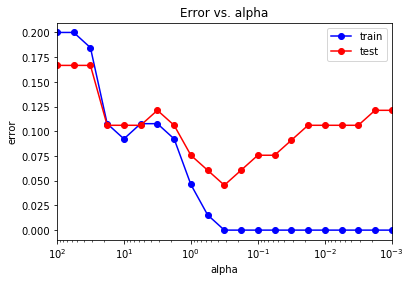

In [98]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [99]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0454545454545


In [100]:
alpha_opt = alpha_arr[test_err == min_test_err]

In [101]:
alpha_opt = alpha_opt[0]

In [102]:
print( alpha_opt)

0.316227766017


Классификатор при найденном оптимальном значении alpha:

In [103]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0454545454545


После подбора параметра alpha ошибка с 15% снизилась до 4.5%

Посмотрим зависимость ошибки от количества нейронов.

In [104]:
neur_arr = [2, 5, 10, 50, 100]
test_err = []
train_err = []
for neur in neur_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neur, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

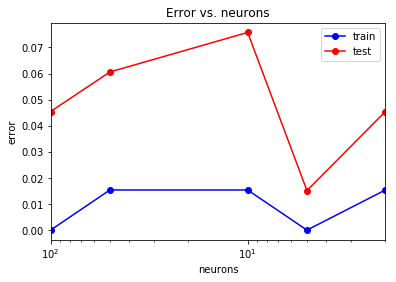

In [105]:
plt.semilogx(neur_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neur_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neur_arr), np.min(neur_arr)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

In [106]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0151515151515


Для оптимального alfa и оптимальном количестве нейронов ошибку удалось снизить с 4,5% до 1,5%. 

Матрица рассогласования:

In [107]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[53  1]
 [ 2 10]]


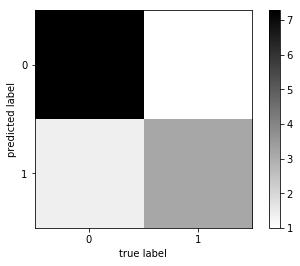

In [108]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Другие метрики качества:

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97        55
        1.0       0.83      0.91      0.87        11

avg / total       0.96      0.95      0.96        66



Теперь рассмотрим двухслойную НС по 100 нейронов.

In [110]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 100), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [111]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [112]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.136363636364


Ошибка на обучающей выборке 0%, на тестовой 13,6%. (против ошибки однослойной НС 15%)

In [113]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

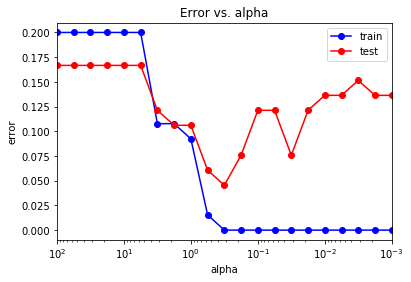

In [114]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [115]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0454545454545


In [116]:
alpha_opt = alpha_arr[test_err == min_test_err]

In [117]:
alpha_opt = alpha_opt[0]

In [118]:
print( alpha_opt)

0.316227766017


При оптимальном альфа ошибка получилась такая же, как и для однослойной НС, т. е. использование двух слоев нецелесообразно.